# Calculate the distance between class 1 centers and class 0 centers

This will loop through every class 1 center (X, Y, Z coordinates in mm) and determine the Euclidean distance between that point and all class 0 centers within the CT scan.

This will help us define the maximum patch size we can create while ensuring that no class 0 patch overlaps and class 1.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("candidates_V2.csv")

In [3]:
df1 = df[df["class"]==1] # Find the class 1

In [4]:
df1.shape

(1557, 5)

In [5]:
dfDistance = pd.DataFrame([])

for row in df1.itertuples():  # Loop through all rows
    
    df0 = df[(df["seriesuid"]==row[1]) &  (df["class"] == 0)].copy(deep=True)  # Get class 0 for the seriesuid of this class 1
    zero_coords = df0[["coordX", "coordY", "coordZ"]].values
    x1 = row[2]; y1 = row[3]; z1 = row[4]
    ones_coords = np.tile([x1, y1, z1], (zero_coords.shape[0], 1)) # Copy ones coord for every zero
    
    distance = np.linalg.norm(ones_coords - zero_coords, axis=1)  # Find Euclidean distance between 1 and the other 0
    
    df0["distance"] = distance
    dfDistance = dfDistance.append(df0)
    

In [23]:
dfDistance.head(10)

,seriesuid,coordX,coordY,coordZ,class,distance
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,68.420000,-74.480000,-288.700000,0,154.664926
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-95.209361,-91.809406,-377.426350,0,276.997539
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-24.766755,-120.379294,-273.361539,0,164.620458
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-63.080000,-65.740000,-344.240000,0,251.008769
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,52.946688,-92.688873,-241.067872,0,130.343226
5,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,54.657731,-104.811860,-249.594543,0,119.956918
6,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,134.730000,-138.790000,-333.760000,0,132.879835
7,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,84.804055,-84.752684,-379.787441,0,199.599644
8,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-76.470000,-171.110000,-258.230000,0,187.685896
9,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-38.560000,-218.480000,-257.820000,0,146.086516


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
%matplotlib inline

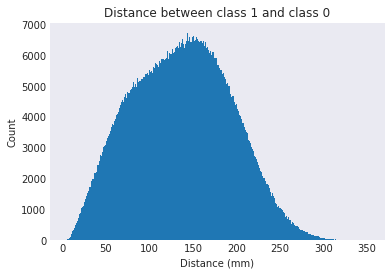

In [34]:
plt.hist(dfDistance["distance"], bins=500);
plt.xlabel("Distance (mm)");
plt.ylabel("Count");
plt.title("Distance between class 1 and class 0");

In [8]:
print("The closest a class 0 center gets to a class 1 center is {:.3f} mm".format(dfDistance["distance"].min()))
print("The farther a class 0 center gets to a class 1 center is {:.1f} mm".format(dfDistance["distance"].max()))

The closest a class 0 center gets to a class 1 center is 2.947 mm
The farther a class 0 center gets to a class 1 center is 353.0 mm


There are 421,662 class 0 centers within 100 mm of a class 1 center


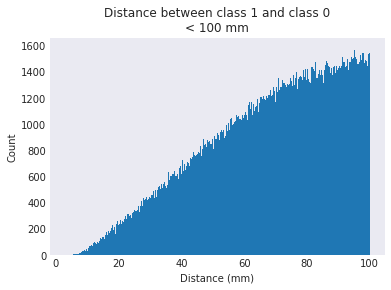

In [30]:
patch_size = 100  # in mm
plt.hist(dfDistance[dfDistance["distance"] < patch_size]["distance"], bins=500);  # Plot cases where class 0 is within this many mm of class 1
plt.xlabel("Distance (mm)");
plt.ylabel("Count");
plt.title("Distance between class 1 and class 0\n< {} mm".format(patch_size));
print("There are {:,} class 0 centers within {} mm of a class 1 center".format(dfDistance[dfDistance["distance"] < patch_size]["distance"].shape[0], patch_size))

There are 30,064 class 0 centers within 32 mm of a class 1 center


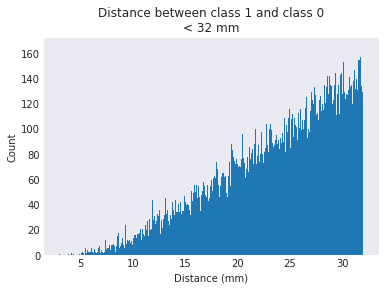

In [31]:
patch_size = 32  # in mm
plt.hist(dfDistance[dfDistance["distance"] < patch_size]["distance"], bins=500);  # Plot cases where class 0 is within this many mm of class 1
plt.xlabel("Distance (mm)");
plt.ylabel("Count");
plt.title("Distance between class 1 and class 0\n< {} mm".format(patch_size));
print("There are {:,} class 0 centers within {} mm of a class 1 center".format(dfDistance[dfDistance["distance"] < patch_size]["distance"].shape[0], patch_size))

In [38]:
patch_size = 64  # in mm
dfThrowAway = dfDistance[dfDistance["distance"] < patch_size]

print("Throw away these class 0s")
dfThrowAway.head(10)

Throw away these class 0s


,seriesuid,coordX,coordY,coordZ,class,distance
21,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,99.4600,-171.540000,-208.630000,0,44.461348
42,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,105.5287,-176.242231,-204.258975,0,42.205159
63,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,118.9200,-160.340000,-250.530000,0,58.450926
64,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,49.7100,-228.910000,-209.120000,0,59.758918
70,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,77.0400,-168.740000,-243.060000,0,53.283035
73,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,66.5300,-243.010000,-258.520000,0,58.133451
87,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,76.6800,-212.090000,-213.910000,0,30.379377
91,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,101.2700,-206.680000,-212.440000,0,15.690760
96,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,65.1200,-165.940000,-215.660000,0,61.206878
110,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,97.3500,-155.430000,-221.280000,0,57.016393


Throw away these class 0s
